![alttext](logo.png)

### Team Tomato: Gustavo Morales - Eduardo López
### Generación :  G10
### Profesores : Heriberto Briceño - Giannina Salomo 
### Fecha : Lunes 2 de Marzo de 2020

☑ Hito 1: Preliminares y Aspectos Computacionales.\
☑ Hito 2: Descripción.\
☑ Hito 3: Modelación descriptiva.\
☑ Hito 4: Modelación predictiva.

# Hito 1

# Preliminares 

### Descripción del problema 
Analizando los crímenes en la ciudad de de Nueva York.
Mediante la información entregada por el departamento de policia de New York se solicita un estudio que entregue de manera detallada si ocurrio o no un arresto y ademas si durante un procedimiento policial concluirá en alguna acción violenta.

### Objetivo 
Desarrollar varios modelos de clasificación para definir si existira violencia durante un procedimiento policial y si ocurrio un arresto o no.

### Solución 
Desarrollo de modelos de clasificación, una vez entrenados y puestos a prueba serán calificados y evaluados entre ellos para definir que modelo es mas exacto y preciso al momento de clasificar. Una vez hecho esto se llevara a cabo el paso fundamental de definir las clases correspondiente a violencia y arresto.

### Métricas de desempeño 
Las métricas de desempeño ayudaran a definir si nuestros modelos son eficientes o no.

Antes de presentar todo tipo de soluciones matemáticas se procederá a graficar las variables consideradas relevantes para la solución de este problema. Para esto se aplicarán gráficos tales como:
* De distribución 

Mediante la interpretación de diversos gráficos se puede poseer una idea o cercanía a como se comportan los datos, así evitando caer en sesgos o malos cálculos.

Para el caso de clasificación se utilizaran las siguientes metricas de desempeño:
* **Precisión**: la exactitud se define como la cantidad de predicciones positivas que fueron correctas.
* **Recall**: el porcentaje de casos positivos detectados.
* **Accuracy**: es la fracción de predicciones correctas entre el número total de registros
* **F1-score**: es una medida para probar el accuracy
* **Curva ROC**: define que tan buen desempeño tiene nuestro modelo.
    * Área bajo la curva (AUC): También a modo de apoyo como metrica a la curva ROC, se utilizara el área bajo la curva.

# Aspectos computacionales

### Librerias para ingesta y preprocesamiento de datos

Para la ingesta y preprocesamiento de datos se utilizaran las librerias de Numpy y Pandas.

In [1]:
import numpy as np 
import pandas as pd

### Librerias para visualización de datos
Para la visualización de datos se utilizaran las librerias de Matplotlib y Seaborn. 

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

Y para definir un estilo estandar se utilizara la base de seaborn

In [3]:
plt.style.use("seaborn")

### Librerias para Machine Learning
Las librerias a continuación facilitan la creación de un modelo en base a la predicción de un vector objetivo utilizando modelos de clasificación.

Dado que se trabajara con un problema de aprendizaje supervisado, se utilizaran los siguientes modelos:

#### Modelos
   * GradientBoostingClassifier
       * Hiperparametros:
       ```python
          gradient_params = {'learning_rate': [0.01, 0.1,0.5],
                             'n_estimators': [50, 100, 500, 1000, 2000],
                             'subsample': [0.1,0.5,0.9]}
       ```
   * AdaBoostClassifier
        * Hiperparametros: 
        ```python 
           ada_params = {'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [50, 100, 500, 1000, 2000]}
        ```
   * DecisionTreeClassifier
        * Hiperparametros: 
        ```python
           max_depth = 4
        ```
   * LogisticRegression
   * SVC
        * Hiperparametros:
        ```python
           params = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                     "gamma": [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}
           cv = 10
        ```
        
#### Métricas
   * roc_curve: para generar curva ROC
   * roc_auc_score: para obtener el area bajo la curva
   * classification_report: para generar un resumen del desempeño del modelo en base a precision, recall, accuracy y F1-score.
   
#### Selección
   * train_test_split: método que divide una matriz de manera aleatoria para generar sets de entrenamiento y prueba. (33% para validación)

### Modulos para implementación de modelos

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

### Modulos para selección y medición de desempeño de modelos

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

#### Modulo para optimizar procesos de aprendizaje en modelos

In [6]:
from sklearn.pipeline import Pipeline

#### Modulo para selección de mejores hiperparametros según modelo

In [7]:
from sklearn.model_selection import GridSearchCV

#### Modulo para serialización de modelos

In [8]:
import pickle

#### Funciones auxiliares y que no se muestren warnings en ejecución

In [9]:
import preproc_nyc_sqf as pre_funcs
import aux_funcs as funcs
import warnings

warnings.filterwarnings("ignore")

plt.style.use("seaborn")

# Hito 2

## Feature Enginering

In [10]:
df = pd.read_csv("2009_1perc.csv").drop(columns = "Unnamed: 0")
df_test = pd.read_csv("2010_1perc.csv").drop(columns = "Unnamed: 0")

In [11]:
df

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2009,41,1779,4032009,130,A,O,P,1.0,CPW,...,,41,G,7,,1013067,0238633,CM,1,20
1,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,...,,108,J,,,1012043,0212157,CM,1,14
2,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,...,,43,E,,,1017599,0240200,CM,1,20
3,2009,77,932,1232009,1843,A,O,P,5.0,MIS,...,,77,J,4,35,1002625,0183442,CM,1,24
4,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,...,,110,H,,,1024535,0209890,CM,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5807,2009,52,3719,3282009,210,A,O,P,1.0,ASSAULT,...,,52,A,,,1009910,0255837,CM,1,9
5808,2009,79,15751,9292009,2008,A,O,P,3.0,CPW,...,,79,F,17,,1001545,0192836,CM,1,20
5809,2009,69,3024,6262009,1937,1,O,P,1.0,FEL,...,,69,B,,,1012860,0174682,CM,1,85
5810,2009,76,1303,3102009,59,1,O,H,1.0,CPM MISD PSA#771,...,,76,A,10,,0981820,0185424,CM,1,27


In [12]:
df_test

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2010,6,487,1192010,1420,1,O,P,2,FEL,...,,6,G,,38,983543,208767,CM,1,85
1,2010,42,7138,9042010,225,1,I,T,10,FELONY,...,,42,E,,,1014172,241737,CM,1,45
2,2010,33,2628,6302010,1240,1,I,T,5,ROBBERY,...,,33,B,6,,1000916,245710,CM,1,85
3,2010,108,6384,11172010,2338,1,O,P,3,CSCS,...,,108,J,,,1012612,212240,CM,1,28
4,2010,14,2295,3072010,2240,1,I,T,5,MISD/ CPW,...,,14,C,7,,987636,212439,CM,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,2010,60,7062,9262010,45,1,O,H,2,MISD,...,,60,I,,,989382,155162,CM,1,20
6009,2010,75,15797,7302010,10,A,O,P,1,ROBBERY,...,,75,A,,,1012757,186018,CM,1,85
6010,2010,123,830,4302010,1630,A,O,P,3,GLA,...,,123,E,,,933868,138600,CM,1,46
6011,2010,115,13122,11232010,2100,1,O,P,1,FELONY,...,,115,E,,,1014722,214388,CM,1,85


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5812 entries, 0 to 5811
Columns: 111 entries, year to detailcm
dtypes: float64(1), int64(18), object(92)
memory usage: 4.9+ MB


No existen datos perdidos (NaN)

In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6013 entries, 0 to 6012
Columns: 111 entries, year to detailcm
dtypes: int64(16), object(95)
memory usage: 5.1+ MB


In [15]:
df, cat_att, num_att = pre_funcs.create_suitable_dataframe(df)
df_test, cat_att_test, num_att_test = pre_funcs.create_suitable_dataframe(df_test)

['perobs']
[]


In [16]:
df

,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,officrid,...,race,haircolr,eyecolor,build,city,sector,beat,post,month,meters
0,A,O,P,P,Y,N,N,N,Y,N,...,B,BK,BR,M,BRONX,G,7,,4,1.798320
2,1,O,P,V,Y,N,N,N,N,N,...,Q,BR,BR,M,BRONX,E,U,,10,1.920240
3,A,O,P,P,Y,N,N,N,Y,N,...,B,BK,BR,T,BROOKLYN,J,4,35,12,1.676400
5,1,I,T,V,Y,N,N,N,N,Y,...,B,BK,BR,M,MANHATTAN,F,16,,5,1.767840
6,1,O,P,P,Y,N,N,N,Y,N,...,B,BK,BR,T,BROOKLYN,N,U,,11,1.557528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,A,O,P,V,Y,Y,N,N,Y,N,...,B,BK,BR,M,BRONX,N,U,3,5,1.554480
5808,A,O,P,P,Y,N,N,N,N,N,...,B,BK,BR,T,BROOKLYN,F,17,,9,1.557528
5809,1,O,P,P,Y,N,N,N,Y,N,...,B,BK,BR,M,BROOKLYN,B,U,,6,1.737360
5810,1,O,H,P,Y,N,Y,N,Y,N,...,B,BK,BR,T,BROOKLYN,A,10,,3,1.767840


### Analisis exploratorio tanto para atributos continuos como discretos.

#### Grafico set de datos 2009

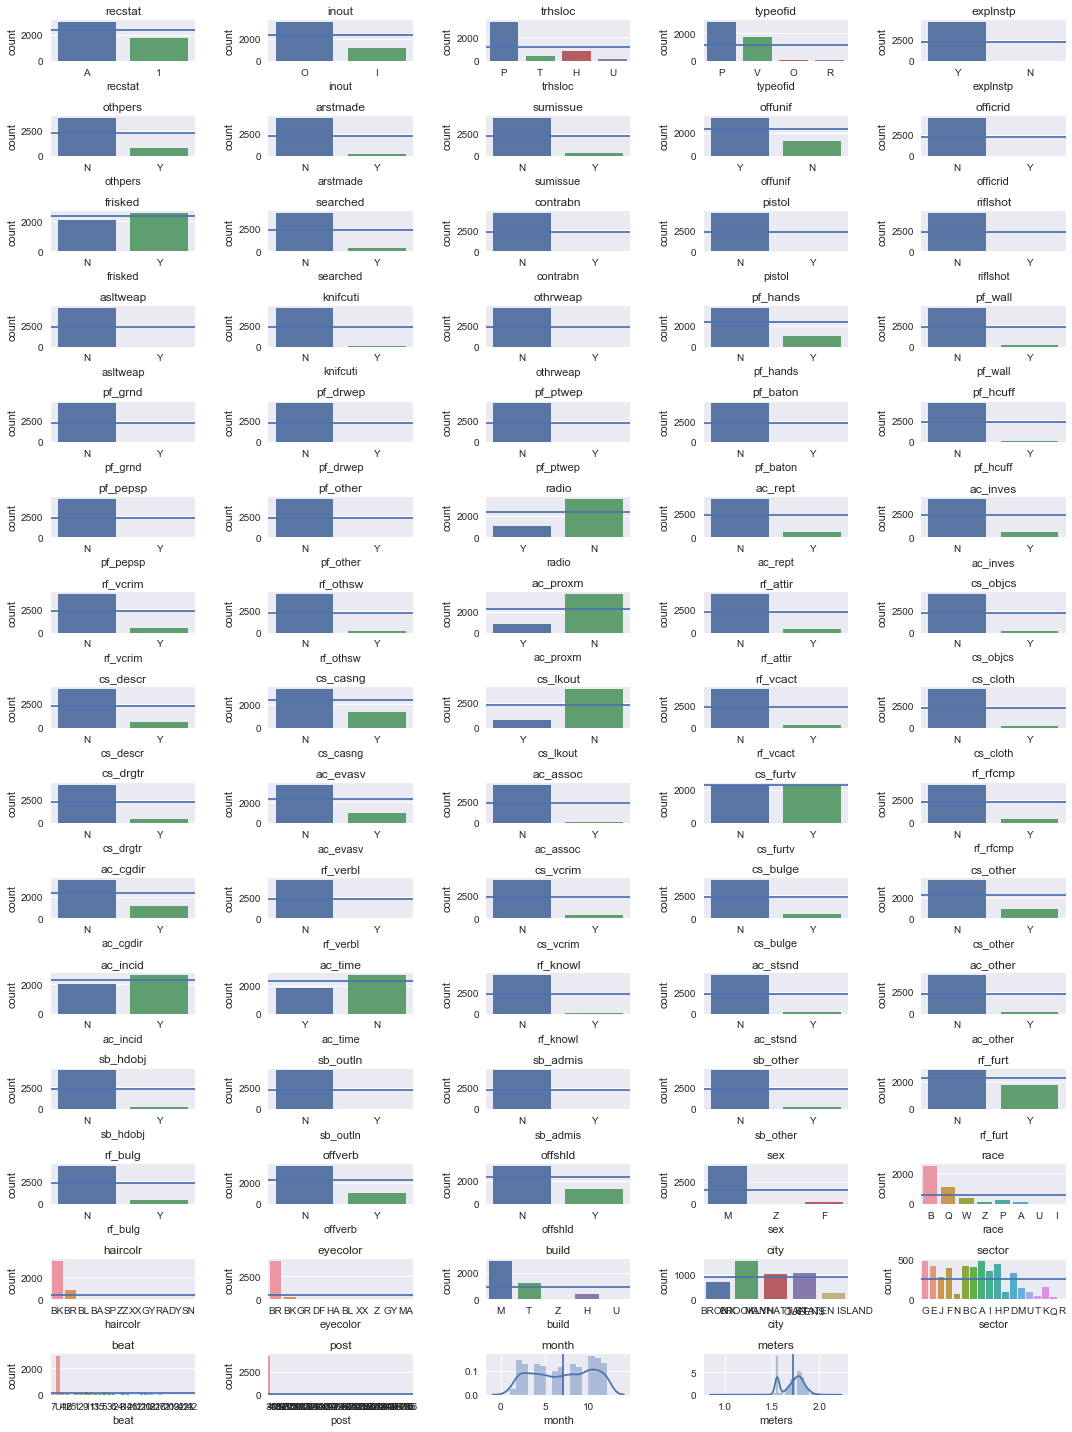

In [17]:
plt.figure(figsize = (15, 20))
funcs.plot_describe_variables(df, 15, 5)

### Dado el gráfico de distribuciones se procede a eliminar columnas que no generan ningun aporte al estudio:
* post
* beat
* meters

#### Grafico set de datos 2010

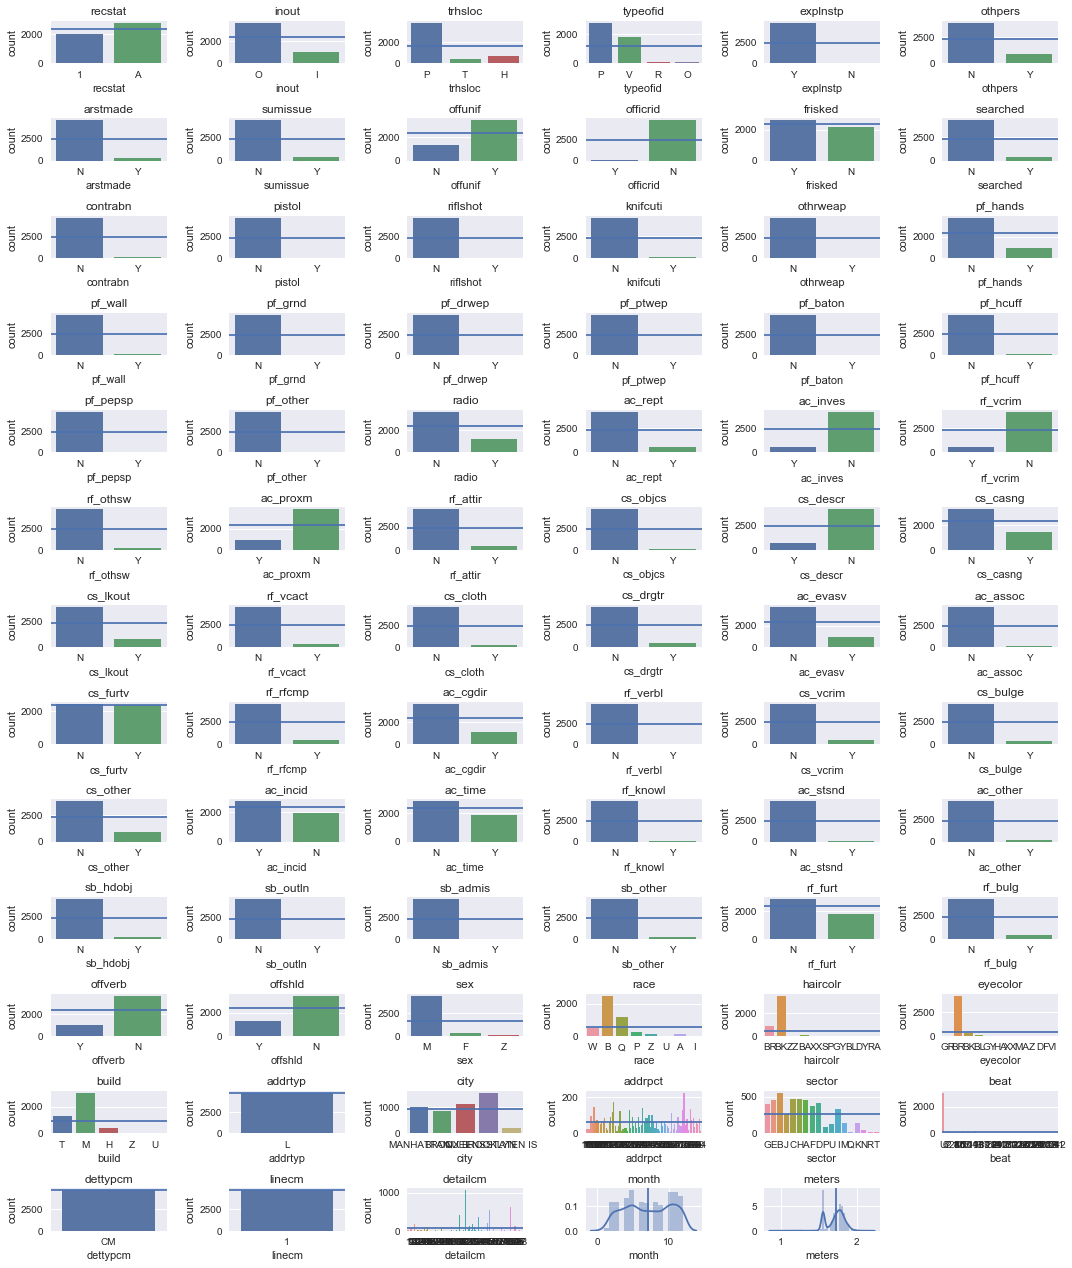

In [18]:
plt.figure(figsize = (15, 20))
funcs.plot_describe_variables(df_test, 15, 6)

### Dado el gráfico de distribuciones se procede a eliminar columnas que no generan ningun aporte al estudio:
* addrpct
* beat
* dettypcm
* linecm
* detailcm
* meters

In [19]:
df = df.drop(columns = ["post", "beat", "meters"])
df_test = df_test.drop(columns = ["addrpct","beat","dettypcm","linecm","detailcm","meters"])

In [20]:
def plot_importance(fit_model, feat_names):
    """TODO: Docstring for plot_importance.

    :fit_model: TODO
    :: TODO
    :returns: TODO

    """
    tmp_importance = fit_model.best_estimator_.feature_importances_ # para acceder a features importantes
    sort_importance = np.argsort(tmp_importance)[::-1]
    names = [feat_names[i] for i in sort_importance]
    plt.title("Feature importance")
    plt.barh(names[:20], tmp_importance[sort_importance][:20])
    plt.yticks(names[:20], names, rotation = 0)

### Binarizamos el dataset 2009 y 2010

In [21]:
df = funcs.binarize_object(df)
df_test = funcs.binarize_object(df_test)

### Primer vector objetivo - Si existe arresto o no
* vector objetivo: arstmade_Y

In [22]:
X = df.drop(["arstmade_Y"], axis = 1)
y = df["arstmade_Y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 63)

## Modelos 

### Gradient Boosting Classifier

```python
gradient_params = {'learning_rate': [0.01, 0.1,0.5],
                   'n_estimators': [50, 100, 500, 1000, 2000],
                   'subsample': [0.1,0.5,0.9]}

grad_model_2009 = GridSearchCV(GradientBoostingClassifier(), gradient_params,
                             cv = 4).fit(X_train, y_train)
```

In [23]:
grad_model_2009 = pickle.load(open("gradmodel_2009_arstmade.sav", 'rb'))

#### Mejores hiperparametros para GradientBoostingClassifier

In [24]:
print(grad_model_2009.best_params_)

{'learning_rate': 0.01, 'n_estimators': 500, 'subsample': 0.9}


#### Desempeño de GradientBoostingClassifer utilizando mejor combinación de hiperparametros

In [25]:
pred_gradient = grad_model_2009.best_estimator_.predict(X_test)

In [26]:
print(classification_report(y_test, pred_gradient))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1450
           1       0.81      0.64      0.71        80

    accuracy                           0.97      1530
   macro avg       0.89      0.81      0.85      1530
weighted avg       0.97      0.97      0.97      1530



### Principales factores asociados al arresto 

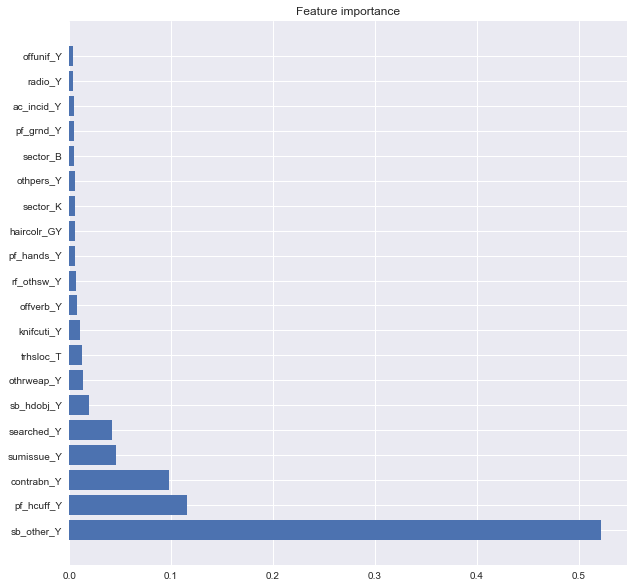

In [27]:
plt.rcParams['figure.figsize'] = 10, 10
plot_importance(grad_model_2009, X.columns)

### Los atributos que aumentan de mayor manera la probabilidad de arresto son:
* sb_other_Y: BASIS OF SEARCH - OTHER -> En que se basan para investigar.
* pf_hcuff_Y: PHYSICAL FORCE - HANDCUFF -> Existio fuerza fisica, esposas.
* contrabn_Y: WAS CONTRABAND FOUND ON SUSPECT ? -> Si el sospechoso andaba con contrabando.

### Ada Boost Classifier

```python
ada_params = {'learning_rate': [0.01, 0.1, 0.5],
              'n_estimators': [50, 100, 500, 1000, 2000]}

ada_model_2009 = GridSearchCV(AdaBoostClassifier(random_state = 63), ada_params,
                             cv = 4).fit(X_train, y_train)
```

In [28]:
# pickle.dump(ada_model_2009, open('adamodel_2009_arstmade.sav','wb')) 
ada_model_2009 = pickle.load(open("adamodel_2009_arstmade.sav", 'rb'))

#### Mejores hiperparametros para AdaBoostClassifier

In [29]:
print(ada_model_2009.best_params_)

{'learning_rate': 0.5, 'n_estimators': 50}


#### Desempeño de AdaBoostClassifier utilizando mejor combinación de hiperparametros

In [30]:
print(classification_report(y_test, ada_model_2009.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1450
           1       0.90      0.55      0.68        80

    accuracy                           0.97      1530
   macro avg       0.94      0.77      0.83      1530
weighted avg       0.97      0.97      0.97      1530



#### Generación de segundo vector objetivo - Si existio violencia o no: 
* Para generar el vector objetivo se utilizaran como referencia los siguientes atributos: 
    * pf_hands: PHYSICAL FORCE USED BY OFFICER - HANDS
    * pf_wall: PHYSICAL FORCE USED BY OFFICER - SUSPECT AGAINST WALL 
    * pf_grnd: PHYSICAL FORCE USED BY OFFICER - SUSPECT ON GROUND
    * pf_drwep: PHYSICAL FORCE USED BY OFFICER - WEAPON DRAWN
    * pf_ptwep: PHYSICAL FORCE USED BY OFFICER - WEAPON POINTED 
    * pf_baton: PHYSICAL FORCE USED BY OFFICER - BATON
    * pf_hcuff: PHYSICAL FORCE USED BY OFFICER - HANDCUFF
    * pf_pepsp: PHYSICAL FORCE USED BY OFFICER - PEPPER SPRAY 
    * pf_other: PHYSICAL FORCE USED BY OFFICER - OTHER

In [31]:
df_pf = df.loc[:,"pf_hands_Y":"pf_other_Y"]

### Generación de segundo vector objetivo - Si ocurrio violencia si o no
* PF -> Physical Force

In [32]:
df["PF"] = -1

In [33]:
for i, row in df_pf.iterrows():
    df["PF"][i] = 1 if (row == 1).any() else 0

In [34]:
df["PF"].value_counts()

0    3500
1    1136
Name: PF, dtype: int64

In [35]:
cols = df_pf.columns.tolist()

Se eliminan las columnas que generaron el nuevo vector objetivo para evitar colinealidad.

In [36]:
df = df.drop(columns = cols)

In [37]:
df

,month,recstat_A,inout_O,trhsloc_P,trhsloc_T,trhsloc_U,typeofid_P,typeofid_R,typeofid_V,explnstp_Y,...,sector_J,sector_K,sector_M,sector_N,sector_P,sector_Q,sector_R,sector_T,sector_U,PF
0,4,1,1,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,10,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,12,1,1,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
5,5,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,11,0,1,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,5,1,1,1,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
5808,9,1,1,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5809,6,0,1,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5810,3,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


## Modelos 

In [38]:
X = df.drop(["PF"], axis = 1)
y = df["PF"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 63)

### Gradient Boosting Classifier

```python
gradient_params = {'learning_rate': [0.01, 0.1,0.5],
                   'n_estimators': [50, 100, 500, 1000, 2000],
                   'subsample': [0.1,0.5,0.9]}

grad_model_2009_PF = GridSearchCV(GradientBoostingClassifier(), gradient_params,
                             cv = 4).fit(X_train, y_train)
```

In [39]:
# pickle.dump(grad_model_2009_PF, open('gradmodel_2009_PF.sav','wb')) 
grad_model_2009_PF = pickle.load(open("gradmodel_2009_PF.sav", 'rb'))

#### Mejores hiperparametros para Gradient Boosting Classifier

In [40]:
grad_model_2009_PF.best_params_

{'learning_rate': 0.01, 'n_estimators': 500, 'subsample': 0.9}

#### Desempeño de GradientBoostingClassifer utilizando mejor combinación de hiperparametros

In [41]:
print(classification_report(y_test, grad_model_2009_PF.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1163
           1       0.50      0.15      0.23       367

    accuracy                           0.76      1530
   macro avg       0.64      0.55      0.54      1530
weighted avg       0.71      0.76      0.71      1530



### Ada Boost Classifier

```python
ada_params = {'learning_rate': [0.01, 0.1, 0.5],
              'n_estimators': [50, 100, 500, 1000, 2000]}

ada_model_2009_PF = GridSearchCV(AdaBoostClassifier(random_state = 63), ada_params,
                             cv = 4).fit(X_train, y_train)
```

In [42]:
# pickle.dump(ada_model_2009_PF, open('adamodel_2009_PF.sav','wb')) 
ada_model_2009_PF = pickle.load(open("adamodel_2009_PF.sav", 'rb'))

#### Mejores hiperparametros para Ada Boost Classifier

In [43]:
ada_model_2009_PF.best_params_

{'learning_rate': 0.5, 'n_estimators': 50}

#### Desempeño de AdaBoostClassifier utilizando mejor combinación de hiperparametros

In [44]:
print(classification_report(y_test, ada_model_2009_PF.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1163
           1       0.54      0.21      0.30       367

    accuracy                           0.77      1530
   macro avg       0.67      0.58      0.58      1530
weighted avg       0.73      0.77      0.73      1530



# Hito 3